In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_movies= pd.read_csv("../data/ml-latest/movies.csv", usecols= ["movieId", "title"], dtype= {"movieId": "int32", "title": "str"})
df_ratings= pd.read_csv("../data/ml-latest/ratings.csv", usecols= ["userId", "movieId", "rating"], dtype= {"userId": "int32", "movieId": "int32", "rating": "float32"})

In [3]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [4]:
df_ratings.describe()

,userId,movieId,rating
count,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542545e+00
std,9.534122e+04,4.992865e+04,1.063959e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,8.295300e+04,1.219000e+03,3.000000e+00
50%,1.661290e+05,3.263000e+03,4.000000e+00
75%,2.474500e+05,4.049100e+04,4.000000e+00
max,3.309750e+05,2.889830e+05,5.000000e+00


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 387.2 MB


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int32 
 1   title    86537 non-null  object
dtypes: int32(1), object(1)
memory usage: 1014.2+ KB


In [7]:
print(df_ratings['userId'].max(), df_ratings['movieId'].max())


330975 288983


In [8]:
df_movies.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [9]:
df_ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


## 1.1B)

In [10]:
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10

,rating_count
movieId,
318,122296
356,113581
296,108756
2571,107056
593,101802
260,97202
2959,86207
527,84232
480,83026


In [11]:
title_number_ratings_top10= df_movies.merge(number_ratings_top10, on= "movieId").sort_values(by="rating_count")

In [12]:
title_number_ratings_top10

,movieId,title,rating_count
7,1196,Star Wars: Episode V - The Empire Strikes Back...,80200
4,480,Jurassic Park (1993),83026
5,527,Schindler's List (1993),84232
9,2959,Fight Club (1999),86207
0,260,Star Wars: Episode IV - A New Hope (1977),97202
6,593,"Silence of the Lambs, The (1991)",101802
8,2571,"Matrix, The (1999)",107056
1,296,Pulp Fiction (1994),108756
3,356,Forrest Gump (1994),113581
2,318,"Shawshank Redemption, The (1994)",122296


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(1, 0, 'Jurassic Park (1993)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

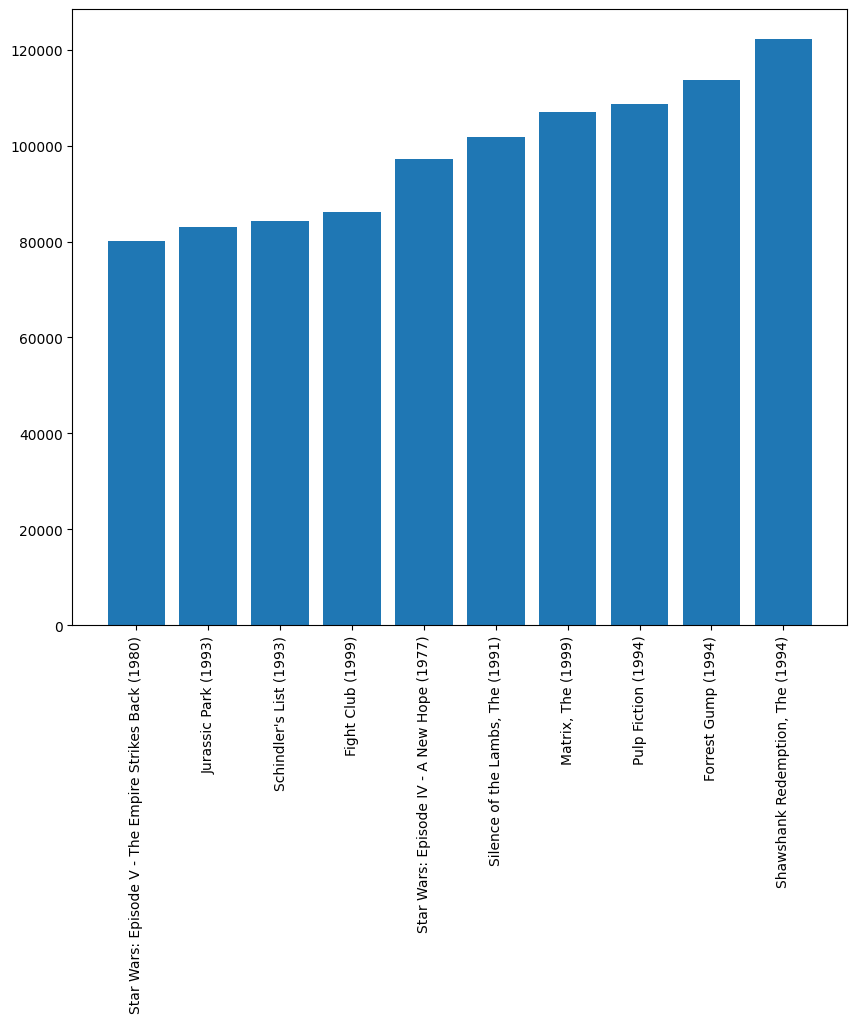

In [13]:
plt.figure(figsize= (10, 8))

plt.bar(title_number_ratings_top10["title"], title_number_ratings_top10["rating_count"])

plt.xticks(rotation= 90)

## 1.1C)

In [14]:
movieids= title_number_ratings_top10["movieId"]
movieids

7    1196
4     480
5     527
9    2959
0     260
6     593
8    2571
1     296
3     356
2     318
Name: movieId, dtype: int32

In [15]:
top10_movie_ratings= df_ratings[df_ratings["movieId"].isin(movieids)]
top10_movie_ratings

,userId,movieId,rating
3,1,260,4.5
4,1,356,5.0
10,1,1196,3.5
26,1,2571,2.5
113,2,296,5.0
...,...,...,...
33831871,330975,480,2.5
33831877,330975,527,3.5
33831890,330975,593,3.0
33831937,330975,1196,2.5


In [16]:
top10_mean_ratings= top10_movie_ratings.groupby("movieId")["rating"].mean()
top10_mean_ratings

movieId
260     4.092401
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float32

In [17]:
title_mean_ratings= df_movies.merge(top10_mean_ratings, on= "movieId").rename(columns= {"rating": "mean_rating"}).sort_values(by= "mean_rating", ascending= False).set_index("movieId")

In [18]:
title_mean_ratings

,title,mean_rating
movieId,,
318,"Shawshank Redemption, The (1994)",4.416792
527,Schindler's List (1993),4.242337
2959,Fight Club (1999),4.236019
296,Pulp Fiction (1994),4.191778
2571,"Matrix, The (1999)",4.160631
593,"Silence of the Lambs, The (1991)",4.150287
1196,Star Wars: Episode V - The Empire Strikes Back...,4.118030
260,Star Wars: Episode IV - A New Hope (1977),4.092401
356,Forrest Gump (1994),4.068189


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Shawshank Redemption, The (1994)'),
  Text(1, 0, "Schindler's List (1993)"),
  Text(2, 0, 'Fight Club (1999)'),
  Text(3, 0, 'Pulp Fiction (1994)'),
  Text(4, 0, 'Matrix, The (1999)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(7, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Jurassic Park (1993)')])

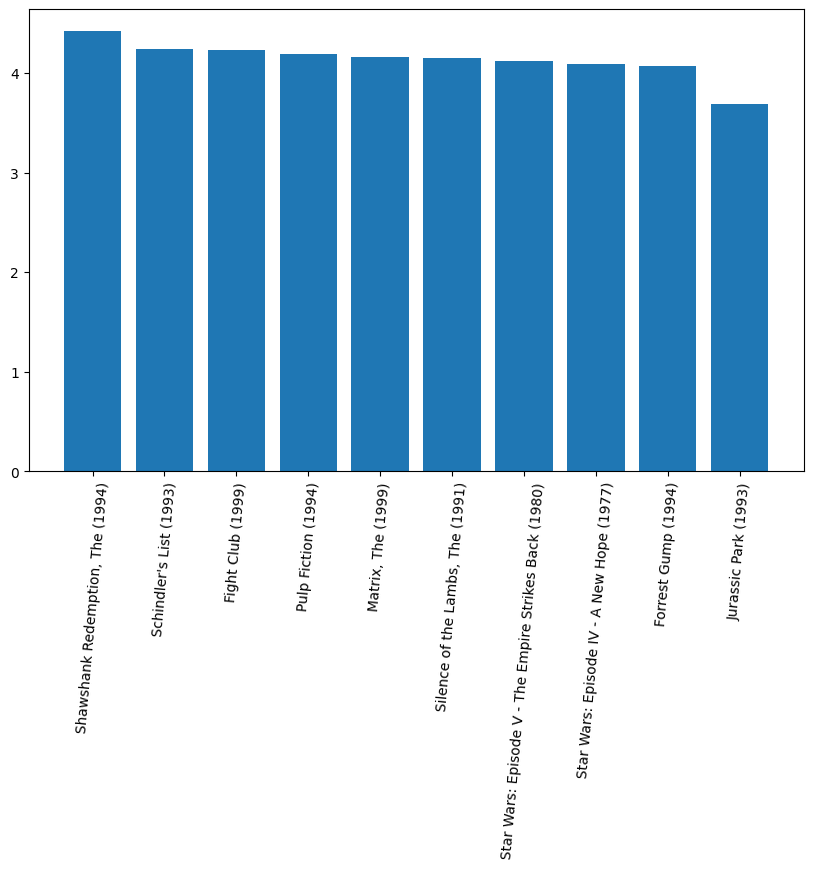

In [19]:
plt.figure(figsize= (10, 6))

plt.bar(title_mean_ratings["title"], title_mean_ratings["mean_rating"])
plt.xticks(rotation= 85)

## 1.1D)

In [20]:
movie_years= df_movies["title"].str.extract(r"\((\d{4})\)")

movie_years.columns= ["year"]
movie_years["title"]= df_movies["title"]


In [21]:
total_movie_year= movie_years.groupby("year")["year"].count().reset_index(name= "count").astype(int)
total_movie_year

,year,count
0,1874,1
1,1878,2
2,1880,1
3,1882,1
4,1883,1
...,...,...
137,2019,3058
138,2020,2628
139,2021,2297
140,2022,1962


([<matplotlib.axis.XTick at 0x26230cbbe50>,
 [Text(1870, 0, '1870'),
  Text(1870, 0, '1870'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text

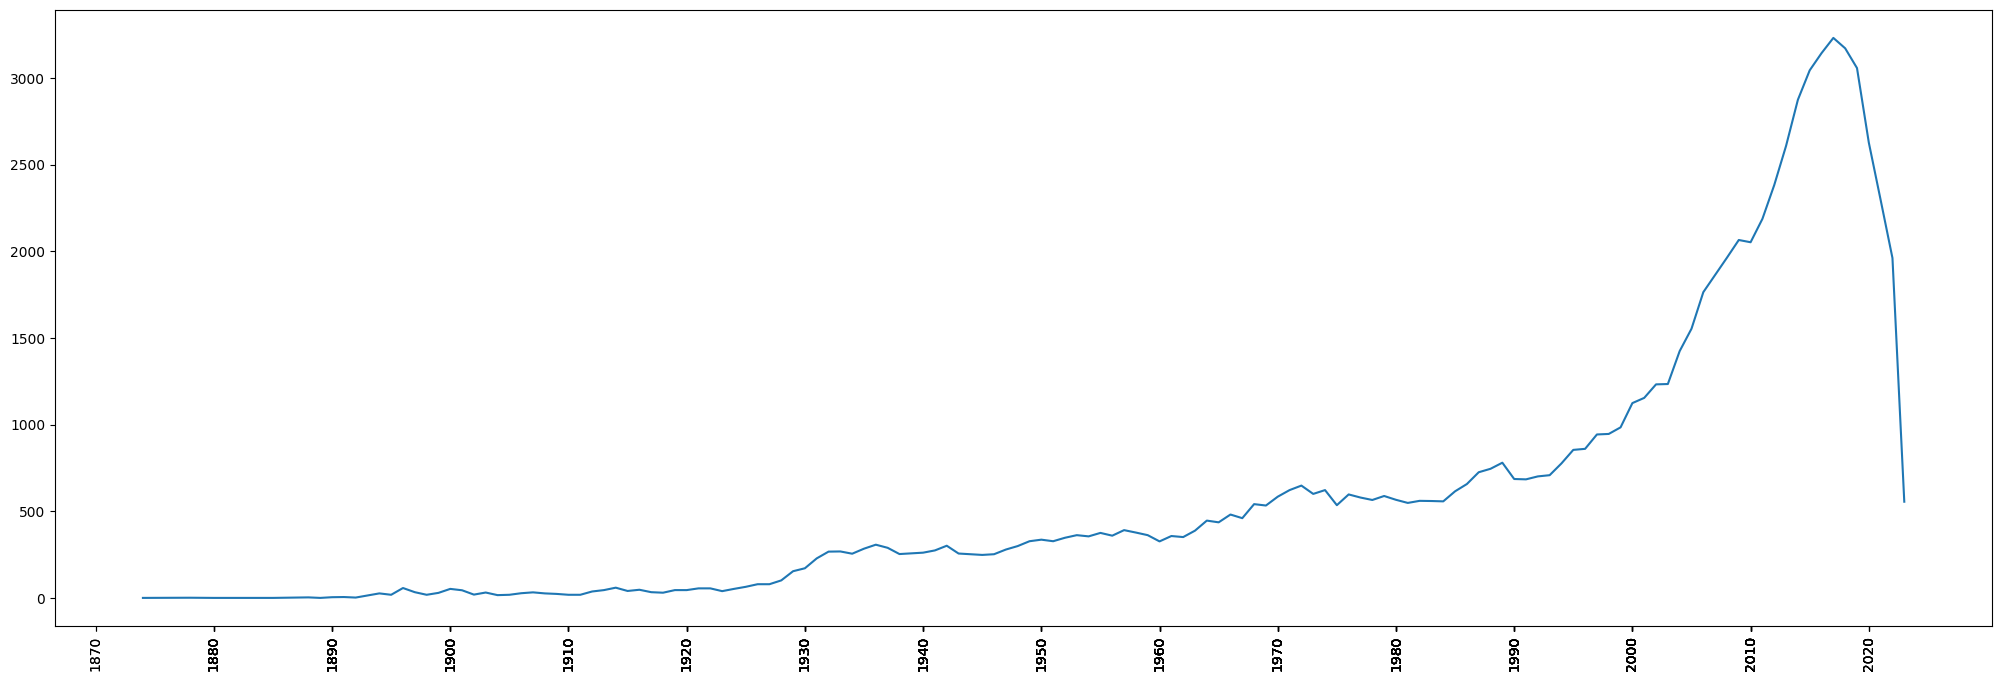

In [22]:
labels= (total_movie_year["year"]// 10)* 10

plt.figure(figsize= (25, 8))

plt.plot(total_movie_year["year"], total_movie_year["count"])

plt.xticks(rotation= 90, ticks= labels)

## 1.1E)

In [23]:
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].sum().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10


rating_per_id= df_ratings.groupby("movieId")["rating"].count().sort_values().reset_index(name= "count").tail(15)
rating_per_id

,movieId,count
83224,7153,75512
83225,110,75514
83226,1210,76773
83227,1,76813
83228,4993,79940
83229,1196,80200
83230,480,83026
83231,527,84232
83232,2959,86207
83233,260,97202


<BarContainer object of 15 artists>

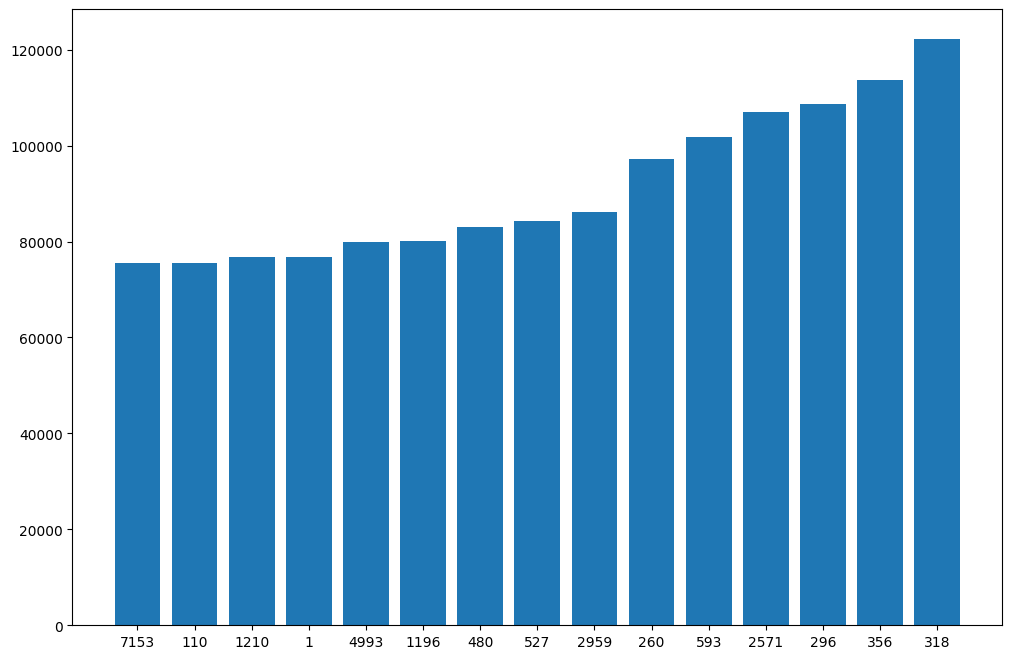

In [24]:
plt.figure(figsize= (12,8))

plt.bar(rating_per_id["movieId"].astype(str), rating_per_id["count"])

## 1.1F)

Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

In [25]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


In [26]:
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [27]:
top10_total_ratings= df_ratings.groupby("movieId")["rating"].count().sort_values().tail(10).reset_index(name= "count")
top10_total_ratings

,movieId,count
0,1196,80200
1,480,83026
2,527,84232
3,2959,86207
4,260,97202
5,593,101802
6,2571,107056
7,296,108756
8,356,113581
9,318,122296


In [28]:
title_count_ratings= top10_total_ratings.merge(df_movies, on= "movieId")
title_count_ratings

,movieId,count,title
0,1196,80200,Star Wars: Episode V - The Empire Strikes Back...
1,480,83026,Jurassic Park (1993)
2,527,84232,Schindler's List (1993)
3,2959,86207,Fight Club (1999)
4,260,97202,Star Wars: Episode IV - A New Hope (1977)
5,593,101802,"Silence of the Lambs, The (1991)"
6,2571,107056,"Matrix, The (1999)"
7,296,108756,Pulp Fiction (1994)
8,356,113581,Forrest Gump (1994)
9,318,122296,"Shawshank Redemption, The (1994)"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(1, 0, 'Jurassic Park (1993)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

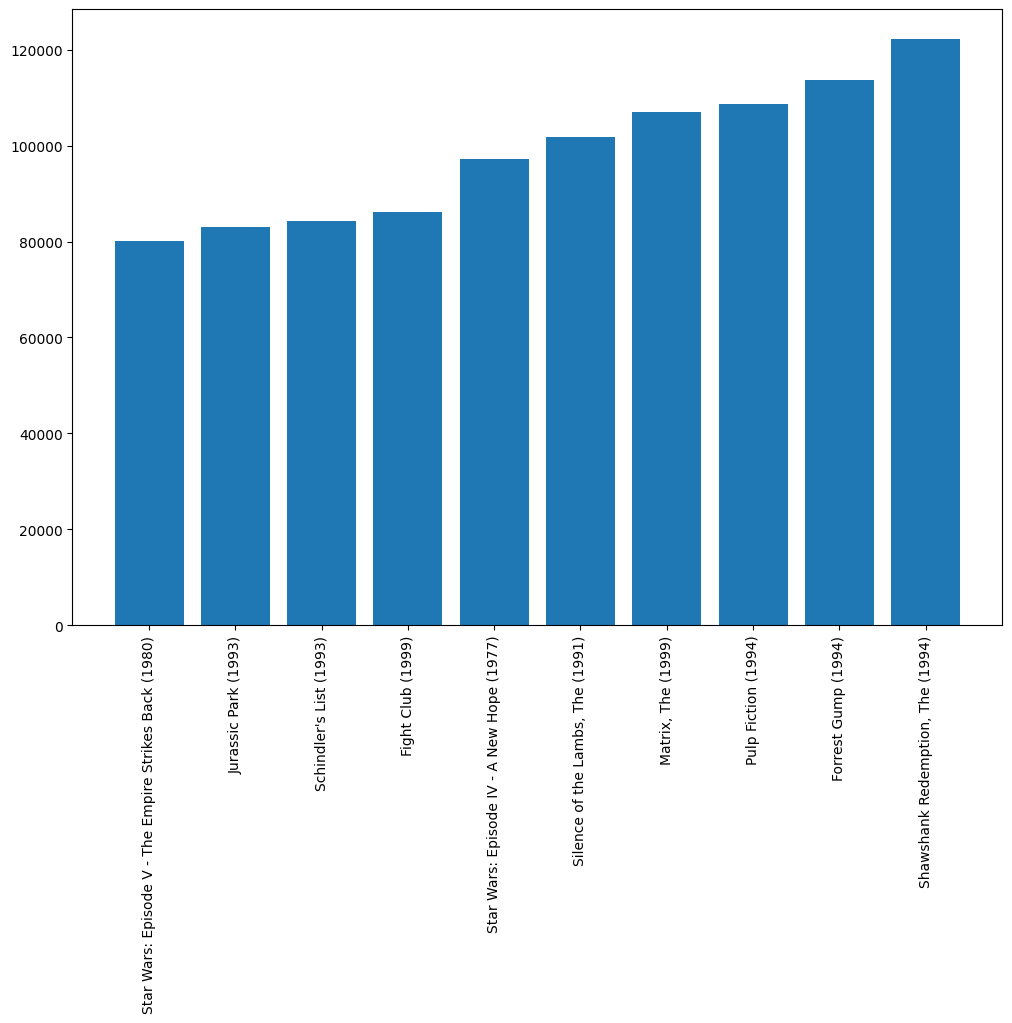

In [29]:
plt.figure(figsize= (12, 8))

plt.bar(title_count_ratings["title"], title_count_ratings["count"])
plt.xticks(rotation= 90)

## 1.2)

In [30]:
id_rating_count_check= df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
id_rating_count_check

,movieId,count
0,1,76813
1,2,30209
2,3,15820
3,4,3028
4,5,15801
...,...,...
83234,288967,1
83235,288971,1
83236,288975,1
83237,288977,1


In [31]:
id_rating_count_check= df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
id_rating_count_check= id_rating_count_check.loc[id_rating_count_check["count"]>2500]
over_25= id_rating_count_check["movieId"]
over_25

0             1
1             2
2             3
3             4
4             5
          ...  
73860    254726
75624    263007
77018    268642
77558    270698
78400    274053
Name: movieId, Length: 2546, dtype: int32

In [32]:
mask= df_ratings["movieId"].isin(over_25)
filtred_ratings= df_ratings.loc[mask]

good_movies= filtred_ratings[filtred_ratings["rating"]> 3]
mask= filtred_ratings["rating"].isin(good_movies["rating"])
filtred_ratings= filtred_ratings.loc[mask]
filtred_ratings


,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832149,330975,6874,4.0
33832153,330975,7139,4.0
33832154,330975,7151,4.0
33832155,330975,7153,4.0


In [33]:

movie_users= filtred_ratings.pivot(index= "movieId", columns= "userId", values= "rating").fillna(0)
movie_users

In [ ]:
from scipy.sparse import csr_matrix
from fuzzywuzzy import process


sparse_movie_users= csr_matrix(movie_users.values)
sparse_movie_users

<840x315942 sparse matrix of type '<class 'numpy.float32'>'
	with 12877823 stored elements in Compressed Sparse Row format>

## 1.3)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn= NearestNeighbors(n_neighbors= 5, algorithm= "brute", metric= "cosine")

# model_knn.fit(sparse_movie_users)

In [ ]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


In [ ]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


In [ ]:
movie_users.index

Index([     1,      2,      3,      5,      6,      7,     10,     11,     16,
           17,
       ...
       166528, 168250, 168252, 176371, 177765, 187593, 195159, 202439, 204698,
       207313],
      dtype='int32', name='movieId', length=840)

In [ ]:
mask= df_movies.index.isin(movie_users.index)
df_movies= df_movies.loc[mask]
df_movies

,movieId,title
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
...,...,...
81847,274993,Ennio: The Maestro (2022)
82459,276881,Mister Blot's Triumph (2001)
84152,281258,12th Man (2022)
85414,285025,The Channel (2016)


In [ ]:
sparse_movie_users

<840x315942 sparse matrix of type '<class 'numpy.float32'>'
	with 12877823 stored elements in Compressed Sparse Row format>

In [ ]:
def Recommendation(title, data, model, n_recommendations):
    model.fit(data)
    index_match= process.extractOne(title, df_movies["title"])[2]
    
    print(index_match)
    
    distances, indices= model.kneighbors(data[index_match].reshape(1, -1), n_neighbors= n_recommendations)
    print("Selected movie: ", df_movies["title"][index_match])
    
    print("Movies you might like: ")
    for i in indices.flatten():
        print(i, df_movies.iloc[i]["title"])
    
Recommendation("starwars", sparse_movie_users, model_knn, 5)

1967


IndexError: row index (1967) out of range

In [ ]:
df_movies.reset_index()["movie"].loc[260]

movieId                514
title      Ref, The (1994)
Name: 260, dtype: object

In [ ]:
df_movies.reset_index().query("movieId == 260")["title"]

141    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object

In [ ]:
df_movies.reset_index().query("movieId == 173")["title"]

98    Judge Dredd (1995)
Name: title, dtype: object

In [ ]:
all(np.array(sparse_movie_users[582].todense())[0] == movie_users.iloc[582].values)

True

In [ ]:
movie_users

userId,1,2,3,4,5,6,7,8,9,10,...,330965,330966,330967,330968,330970,330971,330972,330973,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
filtred_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832149,330975,6874,4.0
33832153,330975,7139,4.0
33832154,330975,7151,4.0
33832155,330975,7153,4.0


In [ ]:
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [ ]:
Recommendation("ironman", sparse_movie_users, model_knn, 5)

442
Selected movie:  Demolition Man (1993)
Movies you might like: 
442 That Thing You Do! (1996)
1219 League of Their Own, A (1992)
634 Jerry Maguire (1996)
326 Truth About Cats & Dogs, The (1996)
742 Wedding Singer, The (1998)


In [ ]:
Recommendation("goodfellas", sparse_movie_users, model_knn, 5)

1213
Selected movie:  Goodfellas (1990)
Movies you might like: 
1213 Sister Act 2: Back in the Habit (1993)
1212 Sister Act (1992)
830 Hocus Pocus (1993)
844 Mighty Ducks, The (1992)
1132 Home Alone 2: Lost in New York (1992)


In [ ]:
Recommendation("jurassic park", sparse_movie_users, model_knn, 5)

480
Selected movie:  Jurassic Park (1993)
Movies you might like: 
480 Monty Python and the Holy Grail (1975)
453 Monty Python's Life of Brian (1979)
496 Star Wars: Episode V - The Empire Strikes Back (1980)
497 Princess Bride, The (1987)
498 Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)


## Some times it doesnt get the choice to 0? So it doesnt match even with it self